# Инициализация

## Импорты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

sns.set(style="whitegrid")

## Загрузка данных

In [3]:
data_iris = load_iris()

data = pd.DataFrame(data_iris.data).rename(columns = {i: data_iris.feature_names[i] for i in range(4)})
data = pd.concat([data, pd.DataFrame(data_iris.target).rename(columns = {0: 'target'})], axis=1)
target_names = pd.DataFrame(data_iris.target).replace({0: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}})
data = pd.concat([data, target_names], axis=1).rename(columns={0: 'target_names'})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# EDA

## Data analysis

In [4]:
data.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
target_names,0


In [5]:
data.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64
target_names,object


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.value_counts('target_names')

,count
target_names,
setosa,50
versicolor,50
virginica,50


### Пропусков нет, баланс классов соблюден, данные все числа, размеры реалистичные - можно принимать в работу

## EDV - data visualization

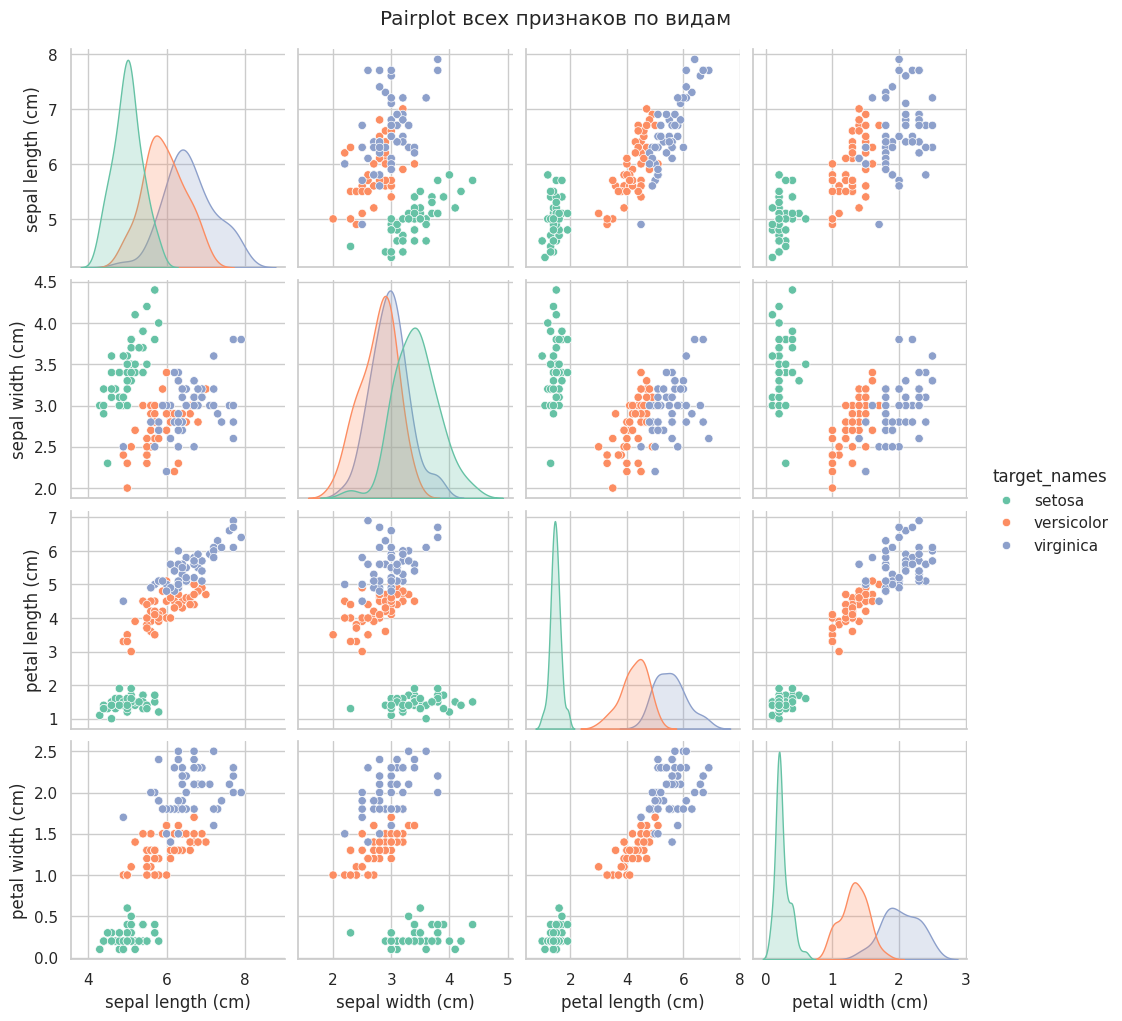

In [8]:
sns.pairplot(data=data.drop('target', axis=1), hue='target_names', palette='Set2')
plt.suptitle('Pairplot всех признаков по видам', y=1.02)
plt.show()

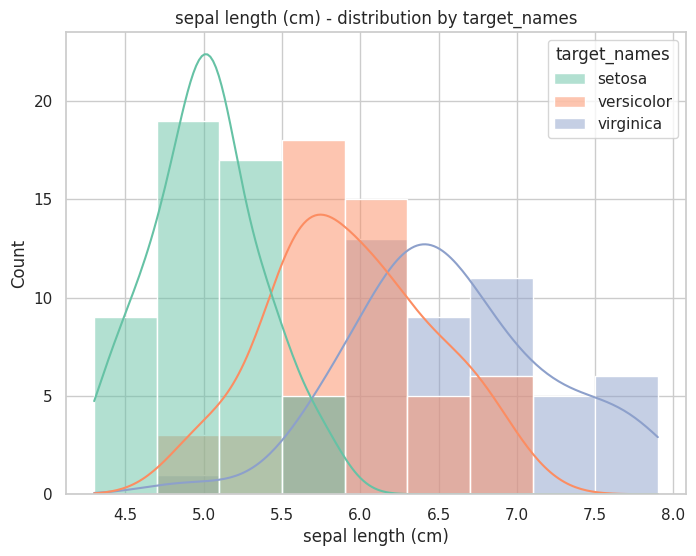

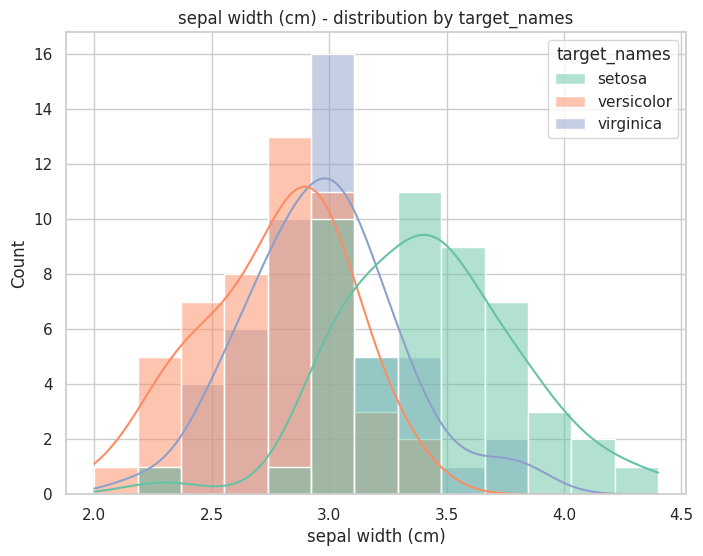

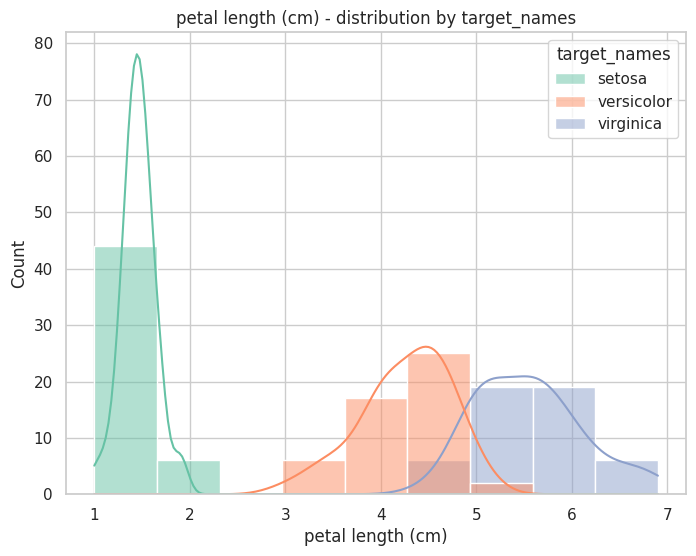

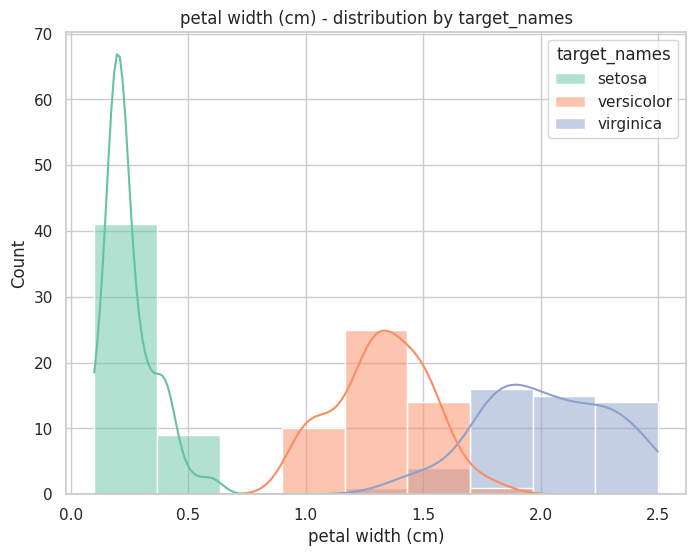

In [9]:
for i in data_iris.feature_names:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data, x=i, hue='target_names', kde=True, palette='Set2')
    plt.title(f'{i} - distribution by target_names')
    plt.show()

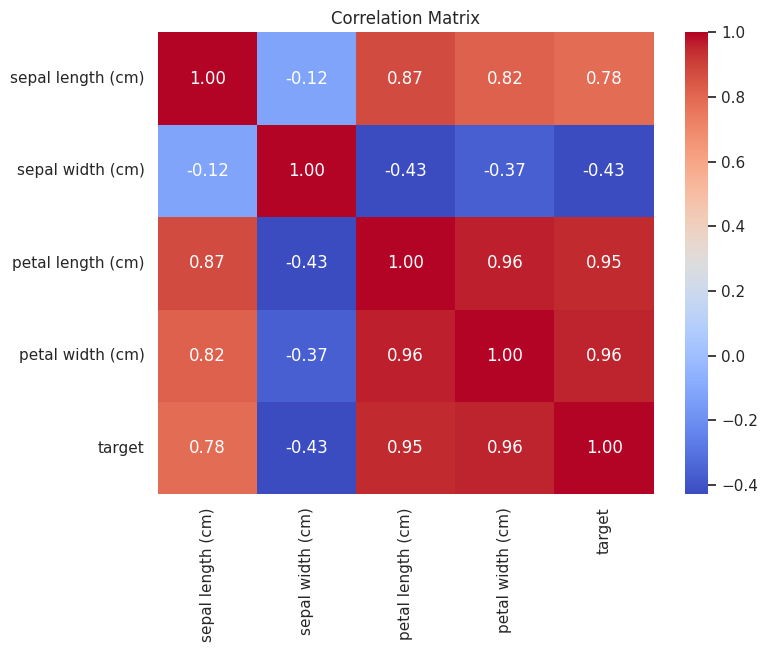

In [10]:
corr = data.drop('target_names', axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Промежуточный результат: видим, что ирисы типа setosa имеют меньшие размеры, а versicolor - средние, virginica - самые большие. Задача классификации будет заключаться скорее в отличиях versicolor от virginica, ведь тип setosa легко можно отличить даже по виду графика

# Машинное обучение

## Сплит данных на выборки

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target', 'target_names'], axis=1), data['target'], test_size=0.2, random_state=42)

## Логистическая регрессия

In [12]:
log_model = LogisticRegression()
time_log_reg = time.time()
log_model.fit(X_train, y_train)
time_log_reg = time.time() - time_log_reg
y_pred_log = log_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_log)}')

Accuracy: 1.0


In [13]:
weights = pd.DataFrame(log_model.coef_).rename(columns={i: data_iris.feature_names[i] for i in range(4)})
weights = pd.concat([weights, pd.DataFrame(log_model.intercept_).rename(columns={0: 'intercept'})], axis=1)
weights.set_index(data_iris.target_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),intercept
setosa,-0.393456,0.962518,-2.375124,-0.998746,9.008843
versicolor,0.508433,-0.254827,-0.213011,-0.775748,1.869022
virginica,-0.114977,-0.707691,2.588136,1.774494,-10.877865


## Метод опорных векторов

In [14]:
svm_model = SVC(kernel='linear')
svm_time = time.time()
svm_model.fit(X_train, y_train)
svm_time = time.time() - svm_time
y_pred_svm = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')

Accuracy: 1.0


## Деревья

### Одиночное дерево решений

In [15]:
decision_tree = DecisionTreeClassifier()
dt_time = time.time()
decision_tree.fit(X_train, y_train)
dt_time = time.time() - dt_time
y_pred_dt = decision_tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')

Accuracy: 1.0


### Лес деревьев

In [16]:
random_for = RandomForestClassifier()
rf_time = time.time()
random_for.fit(X_train, y_train)
rf_time = rf_time - time.time()
y_pred_rf = random_for.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')

Accuracy: 1.0


### Градиентный бустинг

In [17]:
!pip install xgboost
from xgboost import XGBClassifier

In [18]:
gradient_boost = XGBClassifier()
gb_time = time.time()
gradient_boost.fit(X_train, y_train)
gb_time = time.time() - gb_time
y_pred_gb = gradient_boost.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')

Accuracy: 1.0


## Глубокое обучение

In [19]:
neural_model = nn.Sequential(
    nn.Linear(4, 50),
    nn.ReLU(),
    nn.Linear(50, 3),
)

optimizer = optim.Adam(neural_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

EPOCHS = 15000
neural_model.train()
dl_time = time.time()
for epoch in tqdm(range(EPOCHS)):
  optimizer.zero_grad()
  output = neural_model(torch.tensor(X_train.to_numpy(dtype='float32')))
  loss = criterion(output, torch.tensor(y_train.to_numpy(dtype='long')))
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 5000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")
dl_time = time.time() - dl_time

 34%|███▍      | 5079/15000 [00:17<00:21, 466.25it/s]

Epoch 5000 | Loss: 0.0466


 67%|██████▋   | 10027/15000 [00:31<00:14, 355.13it/s]

Epoch 10000 | Loss: 0.0468


100%|██████████| 15000/15000 [00:39<00:00, 375.51it/s]

Epoch 15000 | Loss: 0.0363


In [20]:
neural_model.eval()
y_pred_neural = neural_model(torch.tensor(X_test.to_numpy(dtype='float32')))
print(f'Accuracy: {accuracy_score(y_test, y_pred_neural.argmax(dim=1).numpy())}')

Accuracy: 1.0


In [23]:
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_neural.argmax(dim=1).numpy())
    ],
    'Time': [
        time_log_reg,
        svm_time,
        dt_time,
        rf_time,
        gb_time,
        dl_time
    ]
}).sort_values(by='Time', ascending=True)

metrics.to_csv('metrics.csv', index=False)
print(metrics)

                 Model  Accuracy       Time
3        Random Forest       1.0  -0.182865
2        Decision Tree       1.0   0.003441
1                  SVM       1.0   0.004354
0  Logistic Regression       1.0   0.033760
4              XGBoost       1.0   0.095661
5       Neural Network       1.0  39.949991
